In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/be67fa74-2c34-419c-9249-050394a7eb3e.csv")

In [3]:
df2016 = df[df.year == 2016].iloc[:58,:]  # 8lines contains "NaN"
df2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,"20,152",8.9,25%,NaN,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,"7,929",8.4,27%,45 : 55,2016
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,"15,060",11.7,51%,37 : 63,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,"18,178",14.7,37%,31 : 69,2016
1812,10,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,"14,221",6.9,21%,42 : 58,2016


# Préparation des données: 

In [11]:
df2016 = df2016.dropna()
df2016.isnull().sum()
print(len(df2016))
df2016

50


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2.243,6.9,0.27,0.492537,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19.919,11.6,0.34,0.851852,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15.596,7.8,0.22,0.724138,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18.812,11.8,0.34,0.851852,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11.074,9.0,0.33,0.587302,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7.929,8.4,0.27,0.818182,2016
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,15.060,11.7,0.51,0.587302,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,18.178,14.7,0.37,0.449275,2016
1812,10,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,14.221,6.9,0.21,0.724138,2016
1813,11,Johns Hopkins University,United States of America,77.6,70.0,90.4,98.2,100.0,87.6,15.128,3.6,0.23,1.000000,2016


In [5]:
def convertGender (x):
    a, b= x.split(':')
    c = int(a)/int(b)
    return c
df2016['female_male_ratio'] = df2016['female_male_ratio'].apply(convertGender)

/home/nidhal/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [51]:
df2016.world_rank = [int(each.replace('=','')) for each in df2016.world_rank]
df2016['international_students'] = df2016['international_students'].str.replace(r'%', r'.0').astype('float') / 100.0
df2016['num_students'] = df2016['num_students'].str.replace(r',', r'.').astype('float') 
df2016['income'] = df2016['income'].astype('float') 
df2016['international'] = df2016['international'].astype('float') 
df2016['total_score'] = df2016['total_score'].astype('float') 



AttributeError: 'int' object has no attribute 'replace'

# Matrice de correlation : 

In [12]:
df_2016 = df2016.drop(['year', 'university_name','country'], axis=1)

<AxesSubplot:>

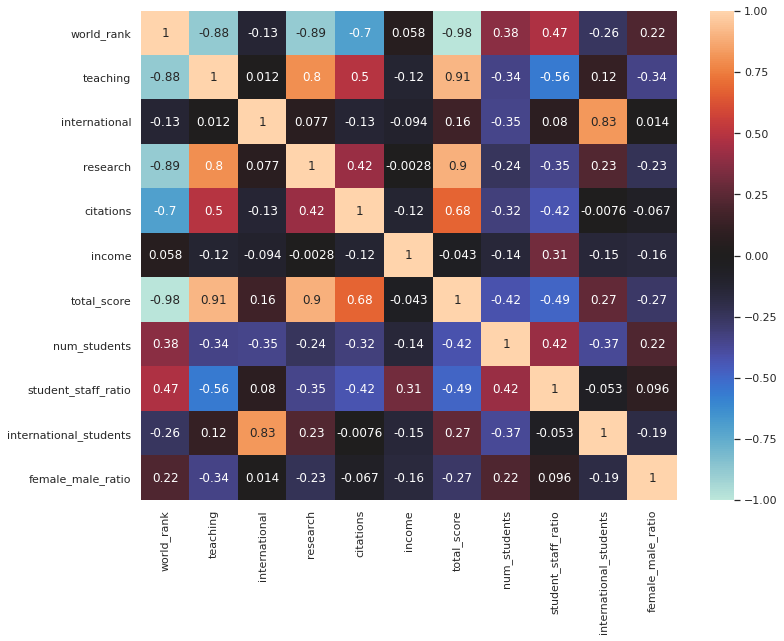

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(df_2016.corr(), annot = True, vmin=-1, vmax=1, center= 0)
#teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio

# ACP :

Définition : l'ACP peut être définie comme la recherche des combinaisons linéaires de plus grande variance des variables initiales (les valeurs propres).

Etapes : 
1-matrice des variances-covariances : (les variances en diagonale et les covariances le reste)
2-Calcul des valeurs propres de la matrice des variances-covariances.
3-création des variables virtuelles dont la colonne VAL. PR. (valeur propre) fournit la variance.
4-Calcul pourcentage de variance de chaque variable virtuelle.
5-standard_scaling = normalisation (standardisation) des variable pour qu'ils evoluent +- avec la mm variance

### 1- Matrice de covariance : 

In [21]:
cols = ['world_rank','teaching','international','research','citations','income','total_score','num_students','student_staff_ratio','international_students','female_male_ratio']
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df_2016[cols].iloc[:,range(0,11)].values)
cov_mat =np.cov(X_std.T)
#np.around(cov_mat,2)

<AxesSubplot:>

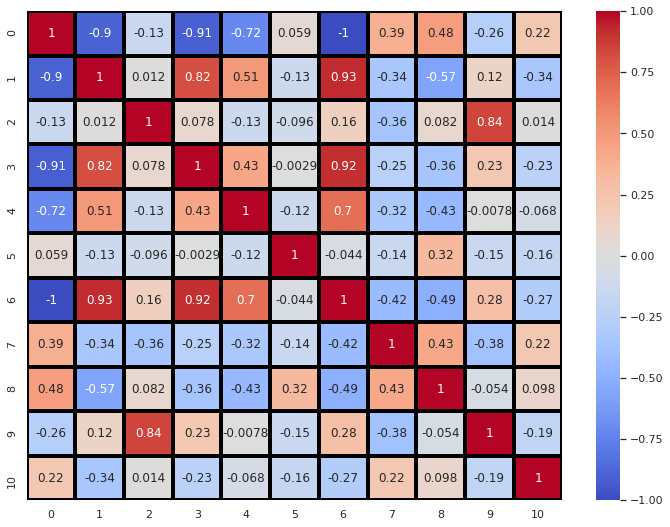

In [22]:
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(cov_mat, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

### 2-Préparation des données : 
Nous devons explicitement centrer et réduire les variables pour réaliser une ACP normée
avec PCA. Nous utilisons la classe StandardScaler pour ce faire.

In [23]:
df_2016 = df2016.drop(['year', 'university_name','country'], axis=1)

#stdsc = StandardScaler()
#X_std = stdsc.fit_transform(df_2016[cols].iloc[:,range(0,10)].values)

In [24]:
#chargement de la première feuille de données
X = df_2016
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

#dimension
print(X.shape) # (50,11)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]


[[-1.68327294  2.16854356 -0.39407262  1.70085846  0.99476201  1.5600668
   1.9847647  -1.83110858 -1.00637403  0.23392612 -1.47496166]
 [-1.62354005  1.39829585  1.23494665  1.81869666  0.88415916  0.43519379
   1.86349104 -0.43947954 -0.33602852  0.8837209  -0.42499918]
 [-1.56380715  1.90615148  0.26503715  1.57395578  1.0058223  -0.01111211
   1.82710894 -0.77982873 -0.87800999 -0.23021301 -0.79819539]
 [-1.50407426  1.54218828  1.07954679  1.61927816  0.68507404 -0.38910587
   1.69370792 -0.52663349 -0.30750317  0.8837209  -0.42499918]
 [-1.44434136  1.64375941  0.67765058  0.88505553  0.98370173  1.45076739
   1.59668899 -1.13584517 -0.70685795  0.79089307 -1.19804848]
 [-1.32487558  1.2797962   0.3829267   1.18418327  0.93946059 -0.52117598
   1.36626904 -1.38345058 -0.79243397  0.23392612 -0.52338727]
 [-1.26514268  1.12743951  1.32068451  0.87599105  0.65189318 -0.44830971
   1.24499538 -0.82202794 -0.32176585  2.46179393 -1.19804848]
 [-1.20540979  0.59419109  1.42249821  1.4

In [25]:
#vérification 
#moyenne
print(np.mean(Z,axis=0))

[ 1.33226763e-17 -4.04121181e-16  3.33066907e-18  1.59872116e-16
  2.19824159e-16 -1.39194212e-16 -4.35207426e-16  2.89490654e-16
 -1.94566585e-16 -1.33226763e-16  1.77635684e-16]


In [26]:
#écart-type
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [28]:
print(acp)

PCA(svd_solver='full')


In [29]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 11

11


In [31]:
#variance expliquée (ensemble des valeurs propres)
val_prop = (n-1)/n*acp.explained_variance_
print(val_prop)

[4.80172467e+00 1.95717653e+00 1.30272114e+00 9.56056611e-01
 8.61071903e-01 5.49055432e-01 2.73797731e-01 1.84620784e-01
 9.57254030e-02 1.80409207e-02 8.87844043e-06]


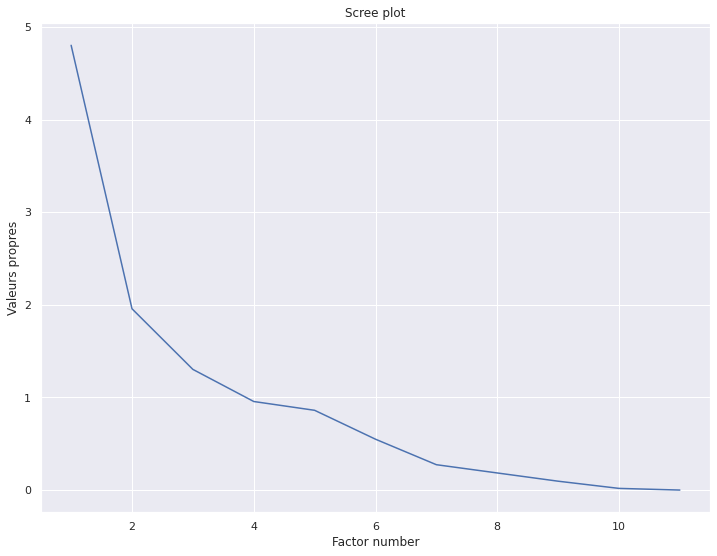

In [33]:
#scree plot
plt.plot(np.arange(1,p+1),val_prop)
plt.title("Scree plot")
plt.ylabel("Valeurs propres")
plt.xlabel("Factor number")
plt.show()

In [34]:
#(correspond au pourcentage de variance de chaque ligne par rapport au total)
print(acp.explained_variance_ratio_)


[4.36520424e-01 1.77925140e-01 1.18429194e-01 8.69142374e-02
 7.82792639e-02 4.99141302e-02 2.48907028e-02 1.67837076e-02
 8.70230937e-03 1.64008370e-03 8.07130948e-07]


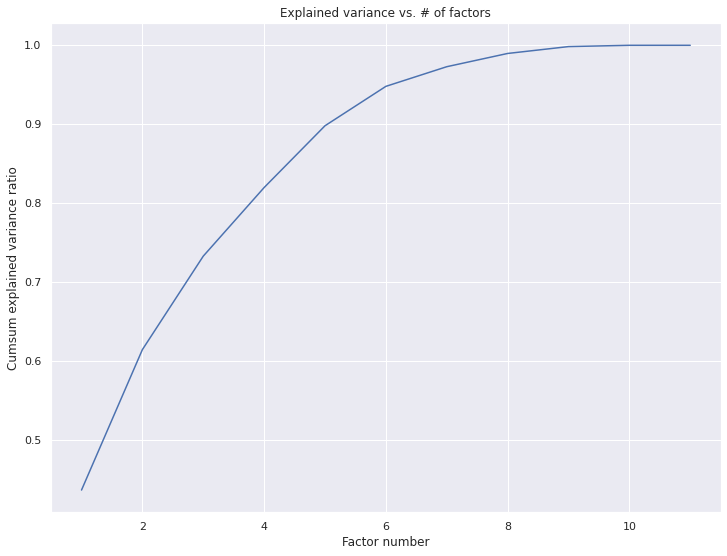

In [37]:
#Le graphique du cumul de variance restituée selon le nombre de facteurs
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

### 3-Détermination du nombre de facteur à retenir
Les ‘’cassures’’ dans les graphiques ci-dessus sont souvent évoquées pour identifier le nombre de facteurs K* à retenir. La solution (K* = 2)semble s’imposer ici.

In [ ]:


#décomposition

In [39]:
from sklearn.decomposition import PCA
columns=X.columns.values #Store the name of the columns for labeling
pca=PCA(n_components=2)
pca.fit(Z)
pca_values=pca.components_
pca.components_

array([[-0.44017149,  0.41268436,  0.08180441,  0.39012699,  0.31027178,
        -0.05077308,  0.44700862, -0.23923635, -0.27676096,  0.15089356,
        -0.14760398],
       [ 0.05777317, -0.12669405,  0.66268353, -0.05755792, -0.21982511,
        -0.01849375, -0.03862842, -0.26599643,  0.1329733 ,  0.62935401,
        -0.05889631]])

Application directe de l'exemple : https://github.com/williamhuybui/PCA_Variable_Factor_Map

In [52]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

def pca_map(X, figsize=(10,10), sup="", print_values= False):
    #PCA
    columns=X.columns.values
    pca=PCA(n_components=2)
    pca.fit(X)
    pca_values=pca.components_
    
    #Plot
    plt.figure(figsize=figsize)
    plt.rcParams.update({'font.size': 14}) 
    
    #Plot circle
    x=np.linspace(start=-1,stop=1,num=500)
    y_positive=lambda x: np.sqrt(1-x**2) 
    y_negative=lambda x: -np.sqrt(1-x**2)
    plt.plot(x,list(map(y_positive, x)), color='maroon')
    plt.plot(x,list(map(y_negative, x)),color='maroon')
    
    #Plot smaller circle
    x=np.linspace(start=-0.5,stop=0.5,num=500)
    y_positive=lambda x: np.sqrt(0.5**2-x**2) 
    y_negative=lambda x: -np.sqrt(0.5**2-x**2)
    plt.plot(x,list(map(y_positive, x)), color='maroon')
    plt.plot(x,list(map(y_negative, x)),color='maroon')
    
    #Create broken lines
    x=np.linspace(start=-1,stop=1,num=30)
    plt.scatter(x,[0]*len(x), marker='_',color='maroon')
    plt.scatter([0]*len(x), x, marker='|',color='maroon')

    #Define color list
    colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
    if len(pca_values[0]) > 6:
        colors=colors*(int(len(pca_values[0])/6)+1)

    #Plot arrow
    add_string=""
    for i in range(len(pca_values[0])):
        xi=pca_values[0][i]
        yi=pca_values[1][i]
        plt.arrow(0,0, 
                  dx=xi, dy=yi, 
                  head_width=0.03, head_length=0.03, 
                  color=colors[i], length_includes_head=True)
        if print_values==True:
            add_string=f" ({round(xi,2)} {round(yi,2)})"
        plt.text(pca_values[0, i], 
                 pca_values[1, i] , 
                 s=columns[i] + add_string )

    plt.xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
    plt.ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
    plt.title('Variable factor map (PCA)')
    plt.suptitle(sup, y=1, fontsize=18)
    plt.show()

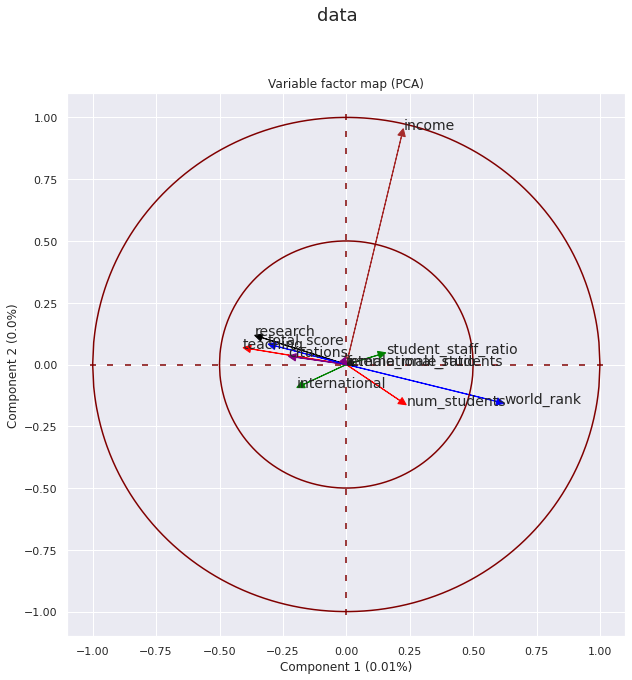

In [53]:
pca_map(X, figsize=(10,10), sup="data")